# Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.



# Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

### Data Repository:- https://archive.ics.uci.edu/ml/datasets/seeds#

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('seeds_dataset.txt',sep='\s+',header=None,names=['area','perimeter','compactness','length_of_ker','width_of_ker','asymmetry_coefficient','lenght_of_ker_groove','varieties'])
df

,area,perimeter,compactness,length_of_ker,width_of_ker,asymmetry_coefficient,lenght_of_ker_groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length_of_ker          210 non-null    float64
 4   width_of_ker           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   lenght_of_ker_groove   210 non-null    float64
 7   varieties              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### No null values are present and everything pre-coded. So let's do a classification analysis.

In [4]:
X=df.iloc[:,:-1]
y=df.varieties

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [6]:
y_train.value_counts()

1    59
2    56
3    53
Name: varieties, dtype: int64

In [7]:
y_test.value_counts()

3    17
2    14
1    11
Name: varieties, dtype: int64

### It looks like labeled data for training and testing.

In [8]:
from sklearn.metrics import confusion_matrix
def model_score(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(str(model)[:str(model).find('(')])
    print('-'*30)
    print(model)
    print("Train score: {:.4f}".format(model.score(X_train,y_train)))
    print("Test score: {:.4f}".format(model.score(X_test,y_test)))
    print(confusion_matrix(pred,y_test))

In [9]:
from sklearn.linear_model import LogisticRegression
model_score(LogisticRegression(penalty='l1',solver='saga',tol=0.004,fit_intercept=False,))

LogisticRegression
------------------------------
LogisticRegression(fit_intercept=False, penalty='l1', solver='saga', tol=0.004)
Train score: 0.9345
Test score: 0.9286
[[10  0  2]
 [ 0 14  0]
 [ 1  0 15]]


In [10]:
from sklearn.linear_model import RidgeClassifierCV
model_score(RidgeClassifierCV())

RidgeClassifierCV
------------------------------
RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))
Train score: 0.9762
Test score: 0.9762
[[11  0  1]
 [ 0 14  0]
 [ 0  0 16]]


### For more accuracy and some advance analysis

In [11]:
import matplotlib.pyplot as plt

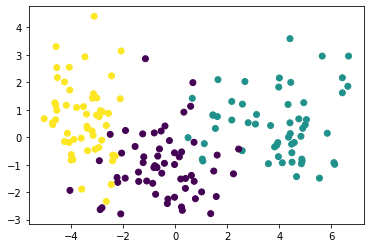

In [12]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)
d_X_train=model.fit_transform(X_train)
d_X_test=model.transform(X_test)
plt.scatter(d_X_train[:,0],d_X_train[:,1],c=y_train)

In [13]:
d_X_train[:4,:]

array([[-3.53515028,  1.11779438],
       [ 4.99201463,  0.45624565],
       [-3.02269199,  1.4330159 ],
       [-0.28758777, -2.24946598]])

In [14]:
# please again import this model otherwise error shows
from sklearn.linear_model import LogisticRegression
X1_train=d_X_train
X1_test=d_X_test
model_score(LogisticRegression(),X_train=X1_train,X_test=X1_test)

LogisticRegression
------------------------------
LogisticRegression()
Train score: 0.8988
Test score: 0.9286
[[10  1  1]
 [ 0 13  0]
 [ 1  0 16]]


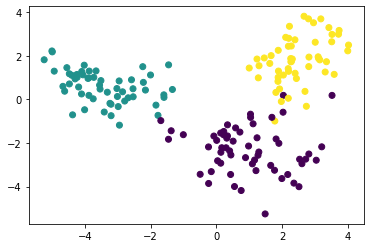

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda=lda.fit_transform(X,y)

from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(lda,y,train_size=0.8,random_state=42)

plt.scatter(X2_train[:,0],X2_train[:,1],c=y_train)

In [16]:
from sklearn.linear_model import LogisticRegression
model_score(LogisticRegression(),X_train=X2_train,y_train=y2_train,X_test=X2_test,y_test=y2_test)

LogisticRegression
------------------------------
LogisticRegression()
Train score: 0.9762
Test score: 0.9524
[[11  0  2]
 [ 0 14  0]
 [ 0  0 15]]


## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix
def model_score(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(str(model)[:str(model).find('(')],'with scaling')
    print('-'*30)
    print(model)
    print("Train score: {:.4f}".format(model.score(X_train,y_train)))
    print("Test score: {:.4f}".format(model.score(X_test,y_test)))
    print(confusion_matrix(pred,y_test))

In [20]:
from sklearn.linear_model import LogisticRegression
model_score(LogisticRegression(penalty='l1',solver='saga',tol=0.004,fit_intercept=False,))

LogisticRegression with scaling
------------------------------
LogisticRegression(fit_intercept=False, penalty='l1', solver='saga', tol=0.004)
Train score: 0.9524
Test score: 0.9524
[[10  0  1]
 [ 0 14  0]
 [ 1  0 16]]


In [21]:
from sklearn.linear_model import RidgeClassifierCV
model_score(RidgeClassifierCV())

RidgeClassifierCV with scaling
------------------------------
RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))
Train score: 0.9702
Test score: 0.9524
[[11  0  2]
 [ 0 14  0]
 [ 0  0 15]]


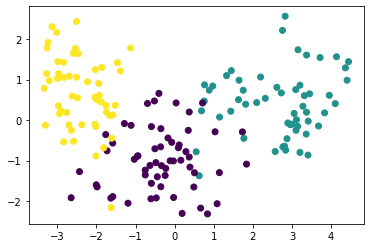

In [22]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)
d_X_train=model.fit_transform(X_train)
d_X_test=model.transform(X_test)
plt.scatter(d_X_train[:,0],d_X_train[:,1],c=y_train)

In [23]:
d_X_train[:4,:]

array([[-2.2285719 ,  0.94473614],
       [ 3.44742646,  0.6485118 ],
       [-2.03375449,  0.56865836],
       [-0.22797192, -1.19450082]])

In [24]:
from sklearn.linear_model import LogisticRegression
X1_train=d_X_train
X1_test=d_X_test
model_score(LogisticRegression(),X_train=X1_train,X_test=X1_test)

LogisticRegression with scaling
------------------------------
LogisticRegression()
Train score: 0.9345
Test score: 0.8810
[[ 9  0  3]
 [ 0 14  0]
 [ 2  0 14]]


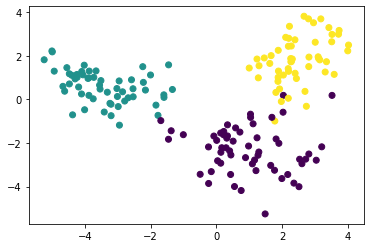

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda=lda.fit_transform(X,y)

from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(lda,y,train_size=0.8,random_state=42)

plt.scatter(X2_train[:,0],X2_train[:,1],c=y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
model_score(LogisticRegression(),X_train=X2_train,y_train=y2_train,X_test=X2_test,y_test=y2_test)

LogisticRegression with scaling
------------------------------
LogisticRegression()
Train score: 0.9762
Test score: 0.9524
[[11  0  2]
 [ 0 14  0]
 [ 0  0 15]]


## Results:-

### Train and Test score without StandardScaler

| S No.|model_name | train_score | test_score |
| --- | --- | --- | --- |
| 1. | LogisticRegression(penalty='l1',solver='saga',tol=0.004,fit_intercept=False,) | 0.9345 | 0.9286 |
| 2. | RidgeClassifierCV() | 0.9762 | 0.9762 |
| 3. | PCA+LogisticRegression() | 0.8988 | 0.9286 |
| 4. | LDA+LogisticRegression() | 0.9762 | 0.9524 |

### Train and Test score after StandardScaler

| S No.|model_name | train_score | test_score |
| --- | --- | --- | --- |
| 1. | LogisticRegression(penalty='l1',solver='saga',tol=0.004,fit_intercept=False,) | 0.9524 | 0.9524 |
| 2. | RidgeClassifierCV() | 0.9702 | 0.9524 |
| 3. | PCA+LogisticRegression() | 0.9345 | 0.8810 |
| 4. | LDA+LogisticRegression() | 0.9762 | 0.9524 |

# Relevant Papers:

M. Charytanowicz, J. Niewczas, P. Kulczycki, P.A. Kowalski, S. Lukasik, S. Zak, 'A Complete Gradient Clustering Algorithm for Features Analysis of X-ray Images', in: Information Technologies in Biomedicine, Ewa Pietka, Jacek Kawa (eds.), Springer-Verlag, Berlin-Heidelberg, 2010, pp. 15-24.